<a href="https://colab.research.google.com/github/Angorith/acorn_python/blob/main/0705_39%EC%9D%BC%EC%B0%A8_AI(%EC%9D%B4%EB%AF%B8%EC%A7%80_%EB%B6%84%EB%A5%98).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from numpy import expand_dims 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
img = load_img('nooriho.jpg')

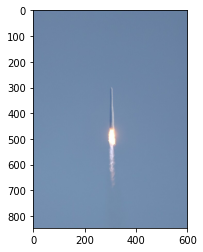

In [ ]:
plt.imshow(img)

In [ ]:
data = img_to_array(img)

In [ ]:
data.shape

(847, 601, 3)

In [ ]:
data = data[np.newaxis,:]

In [ ]:
data.shape

(1, 847, 601, 3)

In [ ]:
datagen= ImageDataGenerator(rotation_range=10,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            shear_range =0.7,
                            zoom_range=[0.9,2.2],
                            horizontal_flip=True,
                            vertical_flip =True,
                            fill_mode='nearest')
data_generator = datagen.flow(data, batch_size=1)

In [ ]:
for i in range(5):
    x = data_generator.next()
    #print(x)
    image = x[0].astype('uint8')
    plt.imshow(image)
    plt.show()

In [ ]:
s = data_generator.next()

In [ ]:
s

array([[[[117.     , 143.     , 176.     ],
         [117.     , 143.     , 176.     ],
         [117.     , 143.     , 176.     ],
         ...,
         [111.     , 137.     , 170.     ],
         [111.     , 137.     , 170.     ],
         [111.     , 137.     , 170.     ]],

        [[117.     , 143.     , 176.     ],
         [117.     , 143.     , 176.     ],
         [117.     , 143.     , 176.     ],
         ...,
         [111.     , 137.     , 170.     ],
         [111.     , 137.     , 170.     ],
         [111.     , 137.     , 170.     ]],

        [[117.     , 143.     , 176.     ],
         [117.     , 143.     , 176.     ],
         [117.     , 143.     , 176.     ],
         ...,
         [111.     , 137.     , 170.     ],
         [111.     , 137.     , 170.     ],
         [111.     , 137.     , 170.     ]],

        ...,

        [[109.     , 133.     , 167.     ],
         [109.     , 133.     , 167.     ],
         [109.     , 133.     , 167.     ],
         ...,


In [ ]:
!cp ./drive/MyDrive/train.zip ./

In [ ]:
!mkdir ./cat_dog

In [ ]:
ls

cat_dog/  drive/  nooriho.jpg  sample_data/  train.zip


In [ ]:
!mkdir cat_dog/raw_data

In [ ]:
!unzip train.zip -d ./cat_dog/raw_data/

Archive:  train.zip
  inflating: ./cat_dog/raw_data/cat.0.jpg  
  inflating: ./cat_dog/raw_data/cat.1.jpg  
  inflating: ./cat_dog/raw_data/cat.10.jpg  
  inflating: ./cat_dog/raw_data/cat.100.jpg  
  inflating: ./cat_dog/raw_data/cat.1000.jpg  
  inflating: ./cat_dog/raw_data/cat.1001.jpg  
  inflating: ./cat_dog/raw_data/cat.1002.jpg  
  inflating: ./cat_dog/raw_data/cat.1003.jpg  
  inflating: ./cat_dog/raw_data/cat.1004.jpg  
  inflating: ./cat_dog/raw_data/cat.1005.jpg  
  inflating: ./cat_dog/raw_data/cat.1006.jpg  
  inflating: ./cat_dog/raw_data/cat.1007.jpg  
  inflating: ./cat_dog/raw_data/cat.1008.jpg  
  inflating: ./cat_dog/raw_data/cat.1009.jpg  
  inflating: ./cat_dog/raw_data/cat.101.jpg  
  inflating: ./cat_dog/raw_data/cat.1010.jpg  
  inflating: ./cat_dog/raw_data/cat.1011.jpg  
  inflating: ./cat_dog/raw_data/cat.1012.jpg  
  inflating: ./cat_dog/raw_data/cat.1013.jpg  
  inflating: ./cat_dog/raw_data/cat.1014.jpg  
  inflating: ./cat_dog/raw_data/cat.1015.jpg  
  i

In [ ]:
import os
import shutil
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers

np.random.seed(3)

In [ ]:
def pre_process(base_dir):
    middle_dir = ['train','validation','test']
    dir_name = ['cats','dogs']
    for i in middle_dir:
        for j in dir_name:
            target_dir = base_dir + i+'/'+j
            os.makedirs(target_dir)

In [ ]:
def data_copy(base_dir):
    file_name = base_dir + 'raw_data/'
    file_mv = base_dir
    for i in range(0,2000):
        if i < 1000:
            shutil.copy(file_name+f'cat.{i}.jpg',file_mv+"train/cats/")
            shutil.copy(file_name+f'dog.{i}.jpg',file_mv+"train/dogs/")
        elif i <1500:
            shutil.copy(file_name+f'cat.{i}.jpg',file_mv+"validation/cats/")
            shutil.copy(file_name+f'dog.{i}.jpg',file_mv+"validation/dogs/")
        else:
            shutil.copy(file_name+f'cat.{i}.jpg',file_mv+"test/cats/")
            shutil.copy(file_name+f'dog.{i}.jpg',file_mv+"test/dogs/")

In [ ]:
base_dir = './cat_dog/'

In [ ]:
pre_process(base_dir)

In [ ]:
data_copy(base_dir)

In [ ]:
def read_images(base_dir):
    train_datagen = ImageDataGenerator(rescale=1./255)
    validation_datagen = ImageDataGenerator(rescale=1./255)
    test_datagen = ImageDataGenerator(rescale=1./255)
    train_generator = train_datagen.flow_from_directory(
        base_dir + 'train',
        target_size = (150, 150),
        batch_size=20,
        class_mode='binary')
    validation_generator = validation_datagen.flow_from_directory(
        base_dir+'validation',
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')
    #print(train_generator.class_indices, validation_generator.class_indices)
    test_generator = test_datagen.flow_from_directory(
        base_dir + 'test',
        target_size=(150,150),
        batch_size=20,
        class_mode='binary')
    return (train_generator, validation_generator, test_generator)

In [ ]:
(train_generator,validation_generator,test_generator) = read_images(base_dir)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
x ,y = next(train_generator)

In [ ]:
x.shape, y.shape

((20, 150, 150, 3), (20,))

In [ ]:
y

array([0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0.,
       0., 0., 0.], dtype=float32)

In [ ]:
print(train_generator.class_indices, validation_generator.class_indices)

{'cats': 0, 'dogs': 1} {'cats': 0, 'dogs': 1}


In [ ]:
x